In [470]:
import pandas as pd
import xgboost as xgb
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [471]:
data_path='./seeds_dataset.txt'
data=pd.read_csv(data_path,header=None,sep='\s+',converters={7:lambda x:int(x)-1})
data.rename(columns={7:'lable'},inplace=True)
data.head()

,0,1,2,3,4,5,6,lable
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [472]:
X=data.iloc[:,:6]
Y=data.iloc[:,7]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

xgb_train=xgb.DMatrix(X_train,label=y_train)
xgb_test=xgb.DMatrix(X_test,label=y_test)

In [473]:
params={
    'objective':'multi:softmax',
    'eta':0.1,
    'max_depth':7,
    'n_estimators':500,
    'num_class':3,
    'alpha': 0.6,
    'lambda': 1.4,
    'colsample_bytree':0.97,
    'min_child_weight':0.5,
    'gamma':0.015,
}

watchlist=[(xgb_train,'train'),(xgb_test,'test')]
# 设置训练轮次，这里设置60轮
num_round=100
bst=xgb.train(params,xgb_train,num_round,watchlist)

[20:56:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	train-mlogloss:0.98281	test-mlogloss:1.00010
[1]	train-mlogloss:0.88413	test-mlogloss:0.91665
[2]	train-mlogloss:0.79993	test-mlogloss:0.84248
[3]	train-mlogloss:0.72592	test-mlogloss:0.77776
[4]	train-mlogloss:0.66156	test-mlogloss:0.71976
[5]	train-mlogloss:0.60595	test-mlogloss:0.67126
[6]	train-mlogloss:0.55492	test-mlogloss:0.62415
[7]	train-mlogloss:0.51056	test-mlogloss:0.58615
[8]	train-mlogloss:0.47010	test-mlogloss:0.54909
[9]	train-mlogloss:0.43396	test-mlogloss:0.51451
[10]	train-mlogloss:0.40117	test-mlogloss:0.48418
[11]	train-mlogloss:0.37114	test-mlogloss:0.45534
[12]	train-mlogloss:0.34548	test-mlogloss:0.43431
[13]	train-mlogloss:0.32201	test-mlogloss:0.41284
[14]	train-mlogloss:0.30041	test-mlogloss:0.39479
[15]	train-mlogloss:0.28068	test-mlogloss:0.37978
[16]	tra

In [474]:
pred=bst.predict(xgb_test)
print(pred)

[0. 2. 2. 2. 1. 0. 2. 1. 2. 2. 1. 1. 1. 0. 1. 0. 2. 1. 0. 2. 1. 0. 1. 1.
 2. 2. 1. 2. 0. 0. 2. 0. 2. 2. 1. 2. 2. 2. 2. 1. 1. 0. 1. 1. 0. 2. 0. 2.
 2. 1. 0. 2. 2.]


In [475]:
#模型评估

# error_rate=np.sum(pred!=test.lable)/test.lable.shape[0]
error_rate=np.sum(pred!=y_test)/y_test.shape[0]

print('测试集错误率(softmax):{}'.format(error_rate))

accuray=1-error_rate
print('测试集准确率：%.4f' %accuray)

测试集错误率(softmax):0.05660377358490566
测试集准确率：0.9434


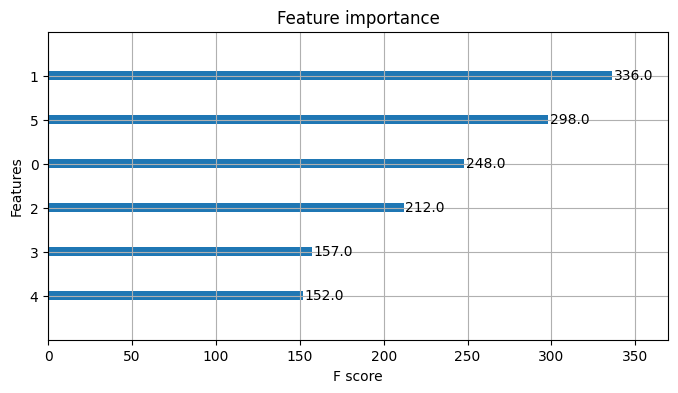

In [476]:
import matplotlib.pyplot as plt
xgb.plot_importance(bst)
plt.rcParams['figure.figsize'] = [8, 4]
plt.show()